In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import *
from funcoes import read_QE_band as readband
from wulffpack import SingleCrystal

In [2]:
bandas = readband(r'CsPbBr3/band-cspbbr3.gnu')
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3.txt', sep = ' ')

In [3]:
DOS = dos['dos(E)']
E = dos['E(eV)']

In [4]:
indices = list(bandas['k'])
len(indices)

101

indice: 80
Band Gap = 1.6869 eV


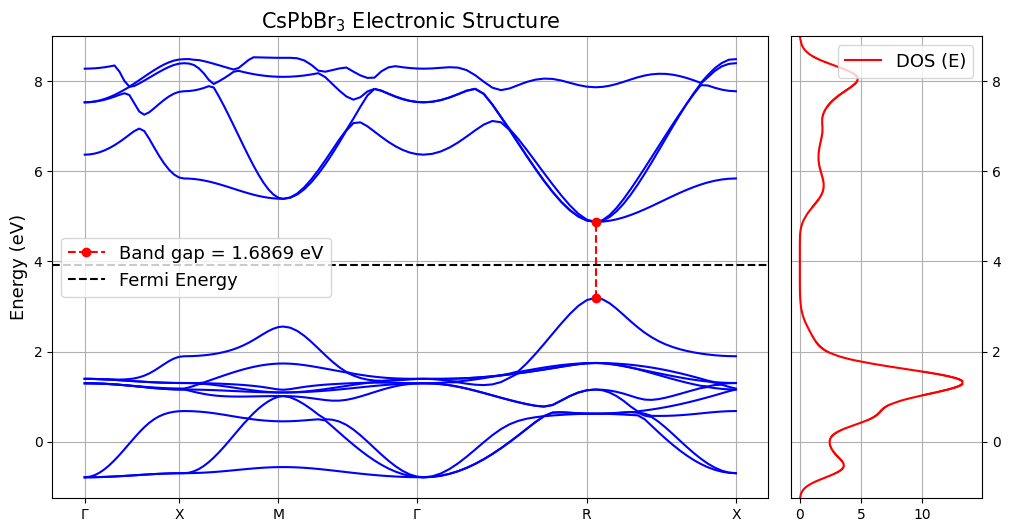

In [5]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[39], indices[59], indices[79], indices[-1]]

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e21'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = 'red', linewidth = 1.5) # conduction band

# Band Gap:
bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][80], bandas['e21'][80]
x2, y2 = bandas['k'][80], bandas['e22'][80]
ax.plot([x1, x2], [y1, y2], color='red', linestyle='--', marker='o', label='Band gap = 1.6869 eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 15)
ax.axhline(3.9128, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

# Surface Bands

## 001

In [6]:
bandas = readband(r'CsPbBr3/band-CsPbBr3-001.gnu')
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3-001.txt', sep = ' ')

In [7]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

[0.0, 1.0, 2.0, 3.4142]
indice: 50
Band Gap = 1.762 eV
Band Gap = 1.762 eV


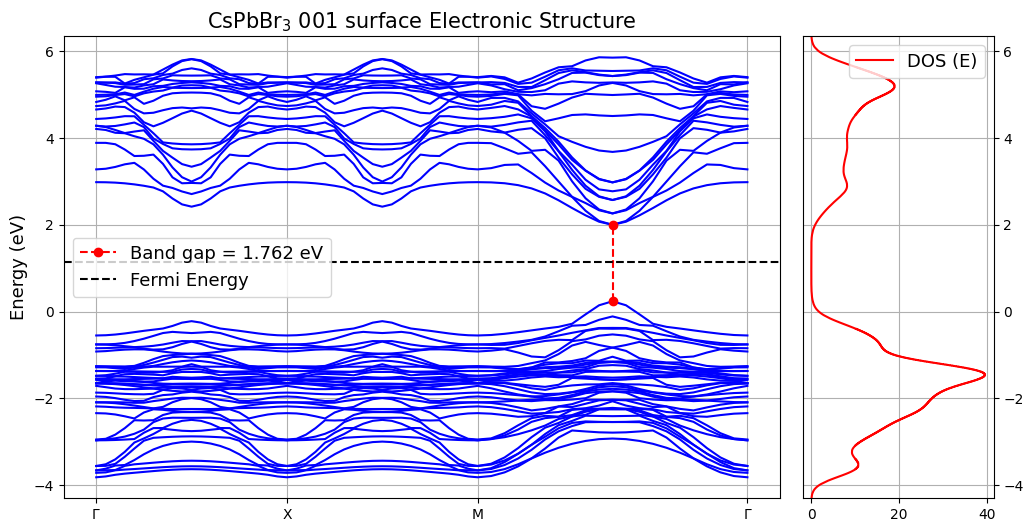

In [8]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(53,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e59'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = 'red', linewidth = 1.5) # conduction band
# Band Gap:
bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][50], bandas['e87'][50]
x2, y2 = bandas['k'][50], bandas['e88'][50]
ax.plot([x1, x2], [y1, y2], color='red', linestyle='--', marker='o', label='Band gap = 1.762 eV')

print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 001 surface Electronic Structure', fontsize = 15)
ax.axhline(1.1380, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig(r'CsPbBr3/banda_CsPbBr3-001.png', dpi = 200)

## 110

In [9]:
bandas = readband(r'CsPbBr3/band-CsPbBr3-110.gnu')
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3-110.txt', sep = ' ')

In [10]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

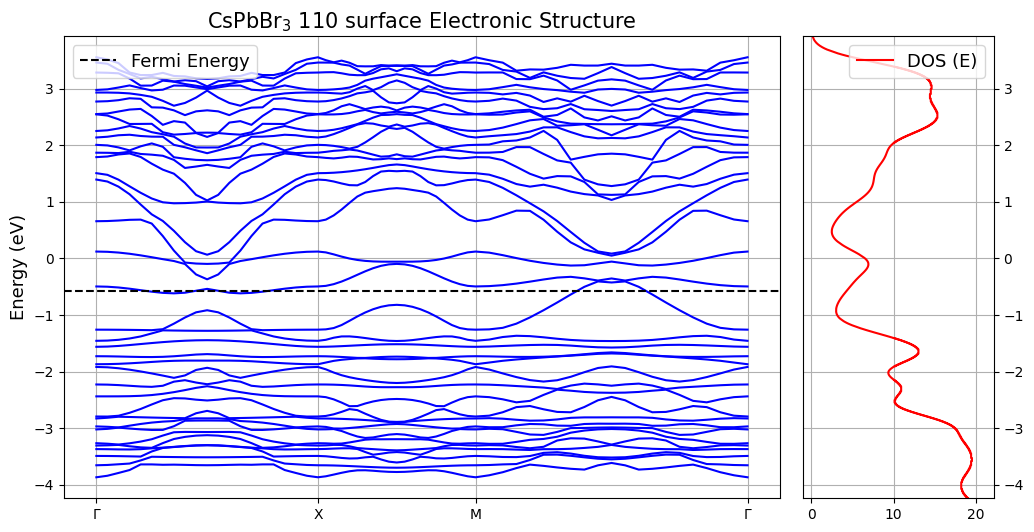

In [11]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(70,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e59'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = 'red', linewidth = 1.5) # conduction band
# Band Gap:
fermi =-0.5706

#print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 110 surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig(r'CsPbBr3/banda_CsPbBr3-110.png', dpi = 200)

## 111

In [12]:
bandas = readband(r'CsPbBr3/band-CsPbBr3-111.gnu')
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3-111.txt', sep = ' ')

In [13]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 47
Band Gap = 0.675 eV


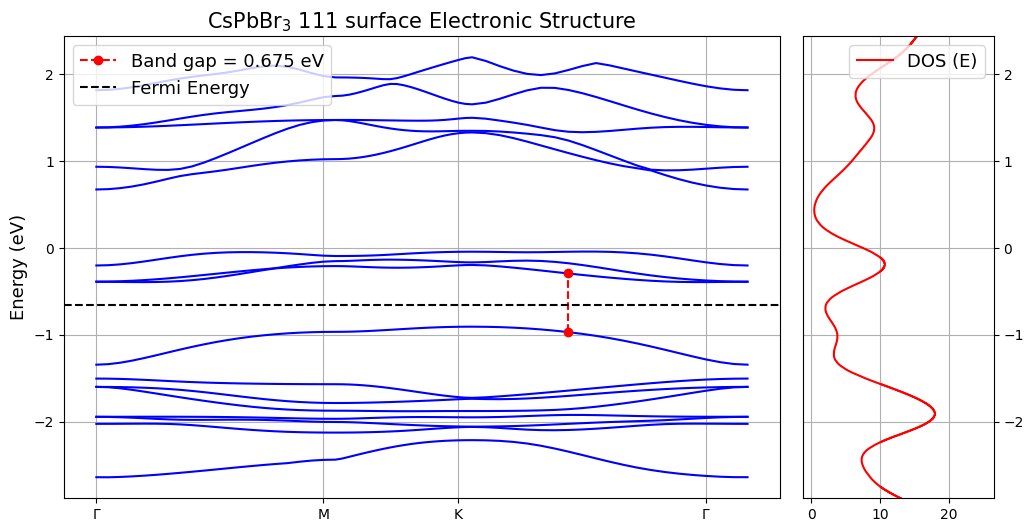

In [14]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[38], indices[57]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(80,nbnd-10):
#for i in range(0,nbnd):    
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e87'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e88'], c = 'red', linewidth = 1.5) # conduction band

# Band Gap:

bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][47], bandas['e87'][47]
x2, y2 = bandas['k'][47], bandas['e88'][47]
ax.plot([x1, x2], [y1, y2], color='red', linestyle='--', marker='o', label='Band gap = 0.675 eV')

#plot:
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M", "K", "$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 111 surface Electronic Structure', fontsize = 15)
ax.axhline(-0.6517, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig(r'CsPbBr3/banda_CsPbBr3-111.png', dpi = 200)